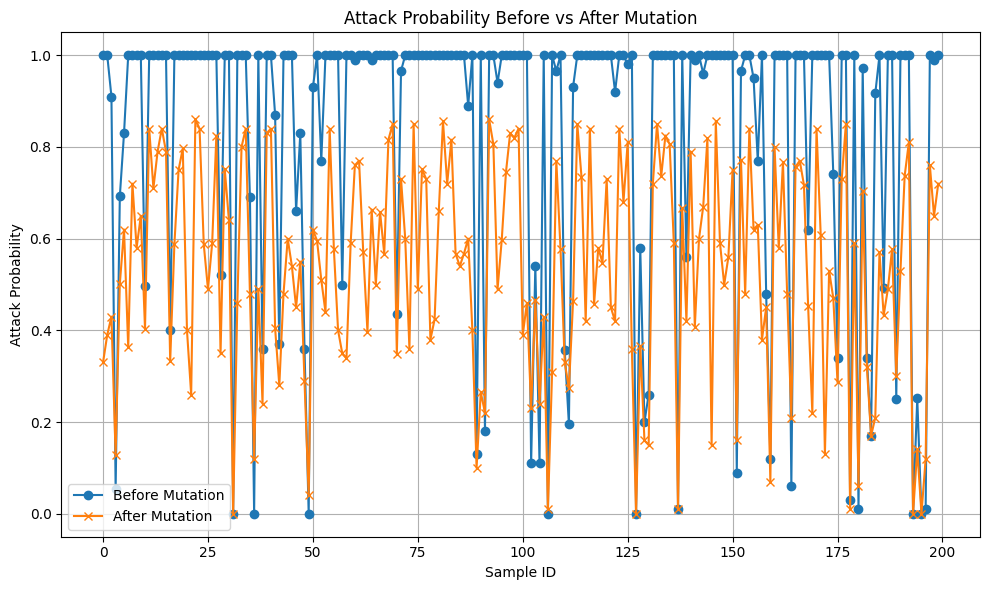

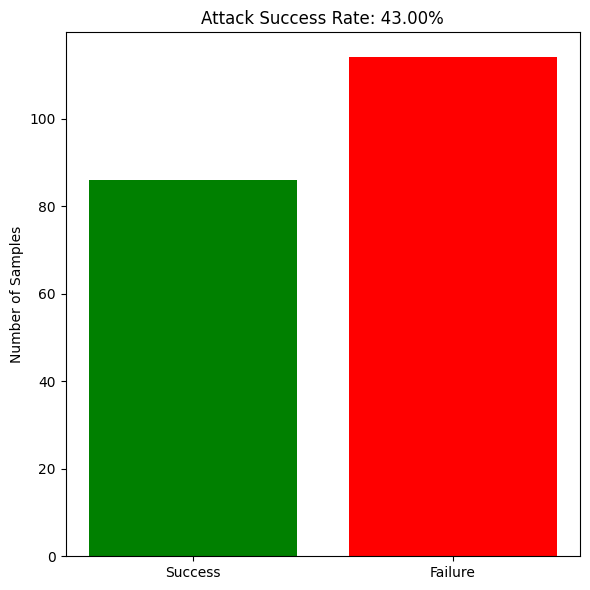

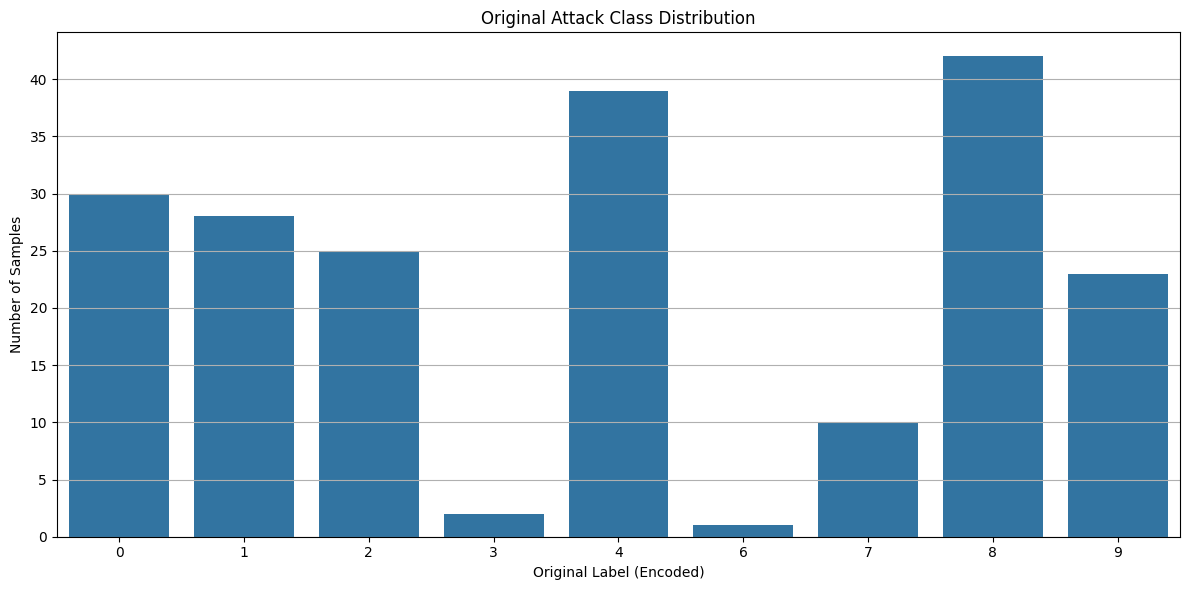

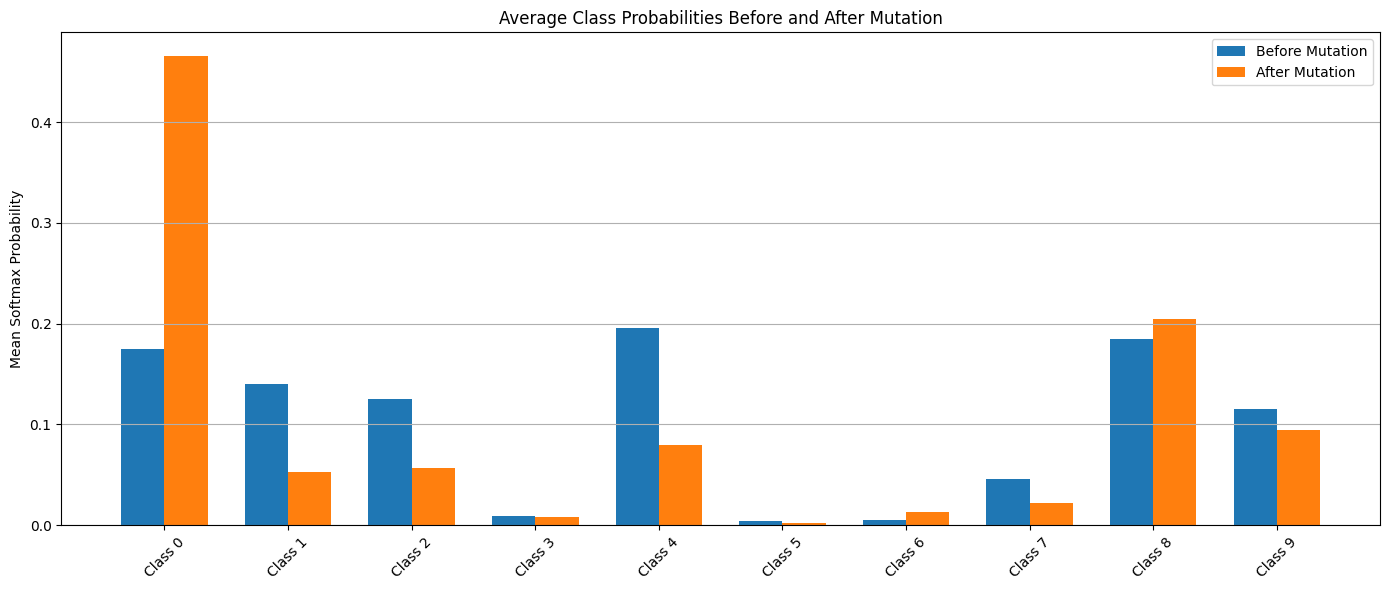

✅ All 4 visualizations for RF GA results generated!


In [ ]:
# =============================
# ✅ Visualizations for Random Forest GA Results
# =============================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load CSV
csv_path = "/results/mutation_statistics_rf_200.csv"  # Adjust path if necessary
df = pd.read_csv(csv_path, sep=';')

# ========== 1. Attack Probability Before vs After Mutation ==========
plt.figure(figsize=(10,6))
plt.plot(df['sample_id'], df['attack_prob_before'], label='Before Mutation', marker='o')
plt.plot(df['sample_id'], df['attack_prob_after'], label='After Mutation', marker='x')
plt.xlabel("Sample ID")
plt.ylabel("Attack Probability")
plt.title("Attack Probability Before vs After Mutation")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# ========== 2. Attack Success Rate (%) ==========
threshold = 0.5  # You can adjust this threshold for attack success definition
successful_attacks = (df['attack_prob_after'] < threshold).sum()
total_samples = len(df)
success_rate = (successful_attacks / total_samples) * 100

plt.figure(figsize=(6,6))
plt.bar(['Success', 'Failure'], [successful_attacks, total_samples - successful_attacks], color=['green', 'red'])
plt.title(f"Attack Success Rate: {success_rate:.2f}%")
plt.ylabel("Number of Samples")
plt.tight_layout()
plt.show()

# ========== 3. Attack Class Breakdown ==========
plt.figure(figsize=(12,6))
sns.countplot(x=df['original_label'])
plt.title("Original Attack Class Distribution")
plt.xlabel("Original Label (Encoded)")
plt.ylabel("Number of Samples")
plt.grid(axis='y')
plt.tight_layout()
plt.show()

# ========== 4. Model Prediction Class Probabilities Change ==========
# Calculate mean softmax vectors before and after
softmax_before = df['attack_class_prob_vector_before'].apply(lambda x: np.array(eval(x)))
softmax_after = df['attack_class_prob_vector_after'].apply(lambda x: np.array(eval(x)))

mean_softmax_before = np.mean(np.stack(softmax_before.values), axis=0)
mean_softmax_after = np.mean(np.stack(softmax_after.values), axis=0)

labels = [f"Class {i}" for i in range(len(mean_softmax_before))]

x = np.arange(len(labels))
width = 0.35

fig, ax = plt.subplots(figsize=(14,6))
rects1 = ax.bar(x - width/2, mean_softmax_before, width, label='Before Mutation')
rects2 = ax.bar(x + width/2, mean_softmax_after, width, label='After Mutation')

ax.set_ylabel('Mean Softmax Probability')
ax.set_title('Average Class Probabilities Before and After Mutation')
ax.set_xticks(x)
ax.set_xticklabels(labels, rotation=45)
ax.legend()
plt.grid(axis='y')
plt.tight_layout()
plt.show()

print("✅ All 4 visualizations for RF GA results generated!")


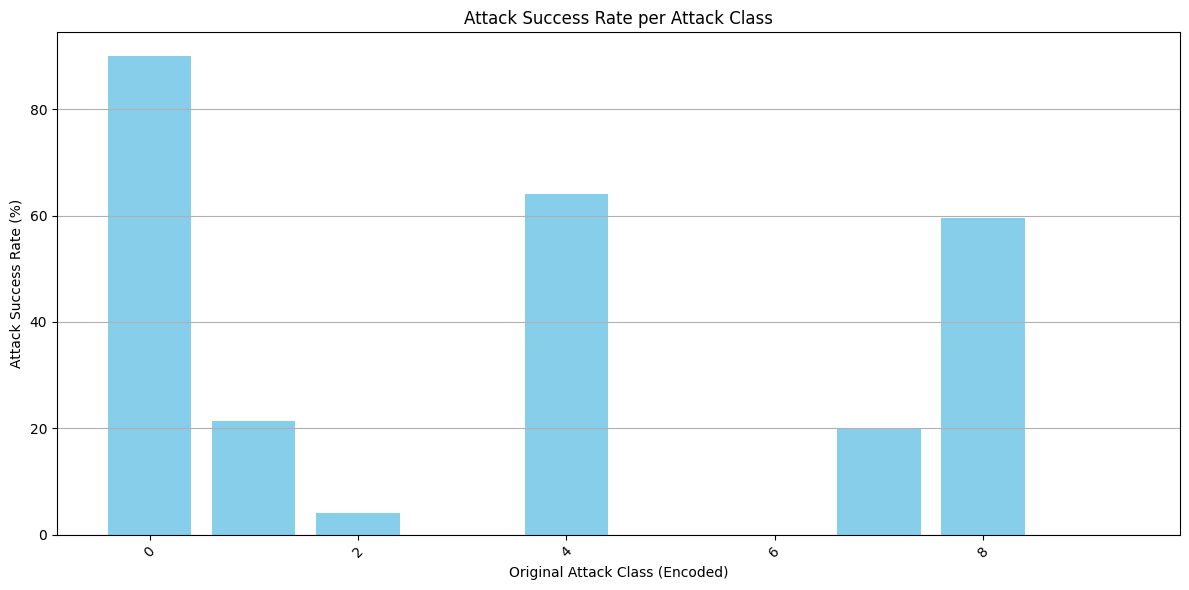

In [ ]:
class_success_rates = {}
classes = df['original_label'].unique()
for cls in classes:
    cls_df = df[df['original_label'] == cls]
    if len(cls_df) > 0:
        success = (cls_df['attack_prob_after'] < threshold).sum()
        total = len(cls_df)
        class_success_rates[cls] = (success / total) * 100

# Plot
plt.figure(figsize=(12,6))
plt.bar(class_success_rates.keys(), class_success_rates.values(), color='skyblue')
plt.xlabel('Original Attack Class (Encoded)')
plt.ylabel('Attack Success Rate (%)')
plt.title('Attack Success Rate per Attack Class')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()